## Global Air Pollution Data Analysis
Dự án thực hiện Phân tích Khám phá Dữ liệu (EDA) trên tập dữ liệu Ô nhiễm Không khí Toàn cầu nhằm điều tra tác động của các chất gây ô nhiễm (CO, NO2, Ozone, PM2.5) đến Chỉ số Chất lượng Không khí (AQI) và trực quan hóa sự phân bố của chúng trên thế giới.

### Import the needed Modules 

In [2]:
pip install contextily --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install geopandas contextily shapely --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

### Loading the Dataset
Trong phần này, chúng tôi sẽ tiến hành đọc tập dữ liệu và xem xét cấu trúc tổng quan của nó để nắm bắt được các thông tin hiện có.

In [5]:
file_path = "global air pollution dataset.csv"
df = pd.read_csv(file_path, sep=',')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [6]:
print(f"Kích thước: {df.shape}")

Kích thước: (23463, 12)


In [7]:
# Thông tin về toàn bộ dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [8]:
# Kiểm tra kiểu dữ liệu của các trường
df.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

In [9]:
# Thống kê mô tả
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


### Data Cleaning
Chúng ta sẽ kiểm tra các giá trị bị thiếu, xử lý các dữ liệu không nhất quán và đảm bảo bộ dữ liệu ở định dạng có thể sử dụng được.

In [10]:
print('Số dòng bị trống dữ liệu từng cột:')
df.isnull().sum()

Số dòng bị trống dữ liệu từng cột:


Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [11]:
# Kiểm tra lại các dòng bị trống dữ liệu
df[df[['Country', 'City']].isna().any(axis=1)]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
535,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good
654,NaN,Kingston Upon Hull,33,Good,1,Good,17,Good,8,Good,33,Good
787,NaN,New Waterford,20,Good,1,Good,18,Good,9,Good,20,Good
801,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy
906,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
22979,NaN,Kyaikkami,54,Moderate,0,Good,20,Good,0,Good,54,Moderate
23115,NaN,Bima,25,Good,1,Good,25,Good,0,Good,24,Good
23311,NaN,Marapanim,25,Good,1,Good,15,Good,0,Good,25,Good
23345,NaN,Calbuco,36,Good,1,Good,15,Good,3,Good,36,Good


In [12]:
# Loại bỏ các dòng bị trống dữ liệu
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(23035, 12)

In [13]:
duplicated_counts = df.duplicated().sum()
df.drop_duplicates()
print(f"Đã loại bỏ {duplicated_counts} dòng trùng lặp.")
df

Đã loại bỏ 0 dòng trùng lặp.


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23030,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23031,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23032,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23033,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


### Download clean Dataset to build App

In [14]:
df.to_csv('global_air_pollution_clean_data_set.csv', index=False)

### Exploratory Data Analysis (EDA)
Trong phần này, chúng ta sẽ phân tích xu hướng ô nhiễm không khí tại các quốc gia khác nhau thông qua các chỉ số thống kê mô tả và biểu đồ trực quan.

Phân tích các nhân tố gây ra ô nhiễm không khí

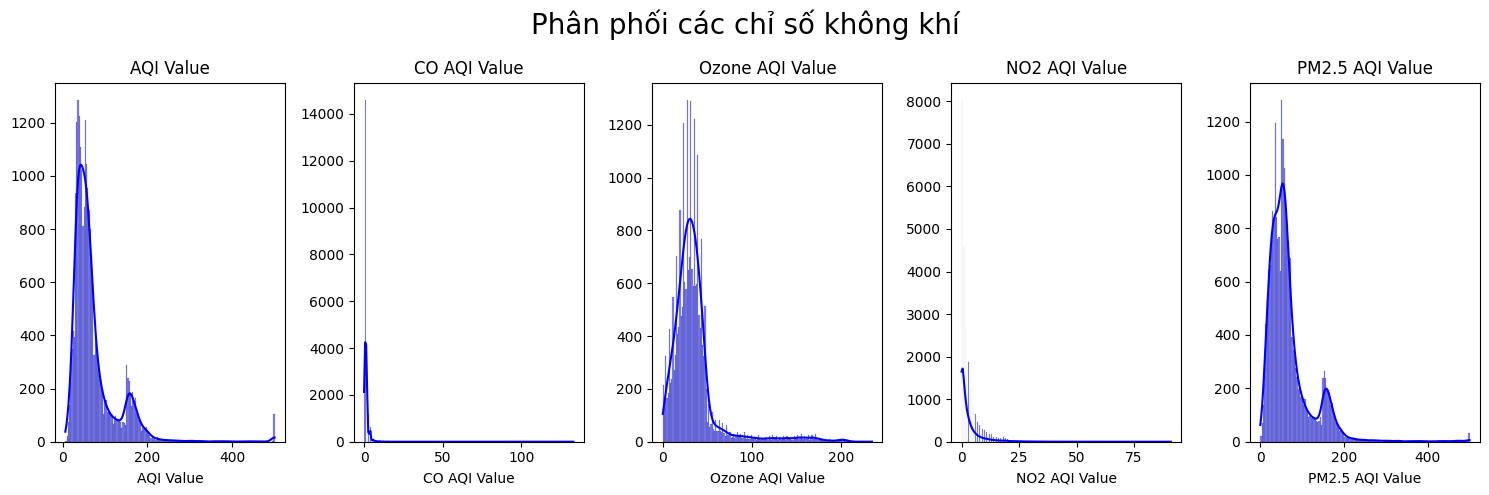

In [15]:
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15, 5))

for i in range(len(col)):
    plt.subplot(1, 5, i+1)
    plt.title(col[i])
    
    sns.histplot(df[col[i]], kde=True, color="blue")
    
    plt.ylabel('') 

plt.suptitle('Phân phối các chỉ số không khí', fontsize=20)
plt.tight_layout()
plt.show()

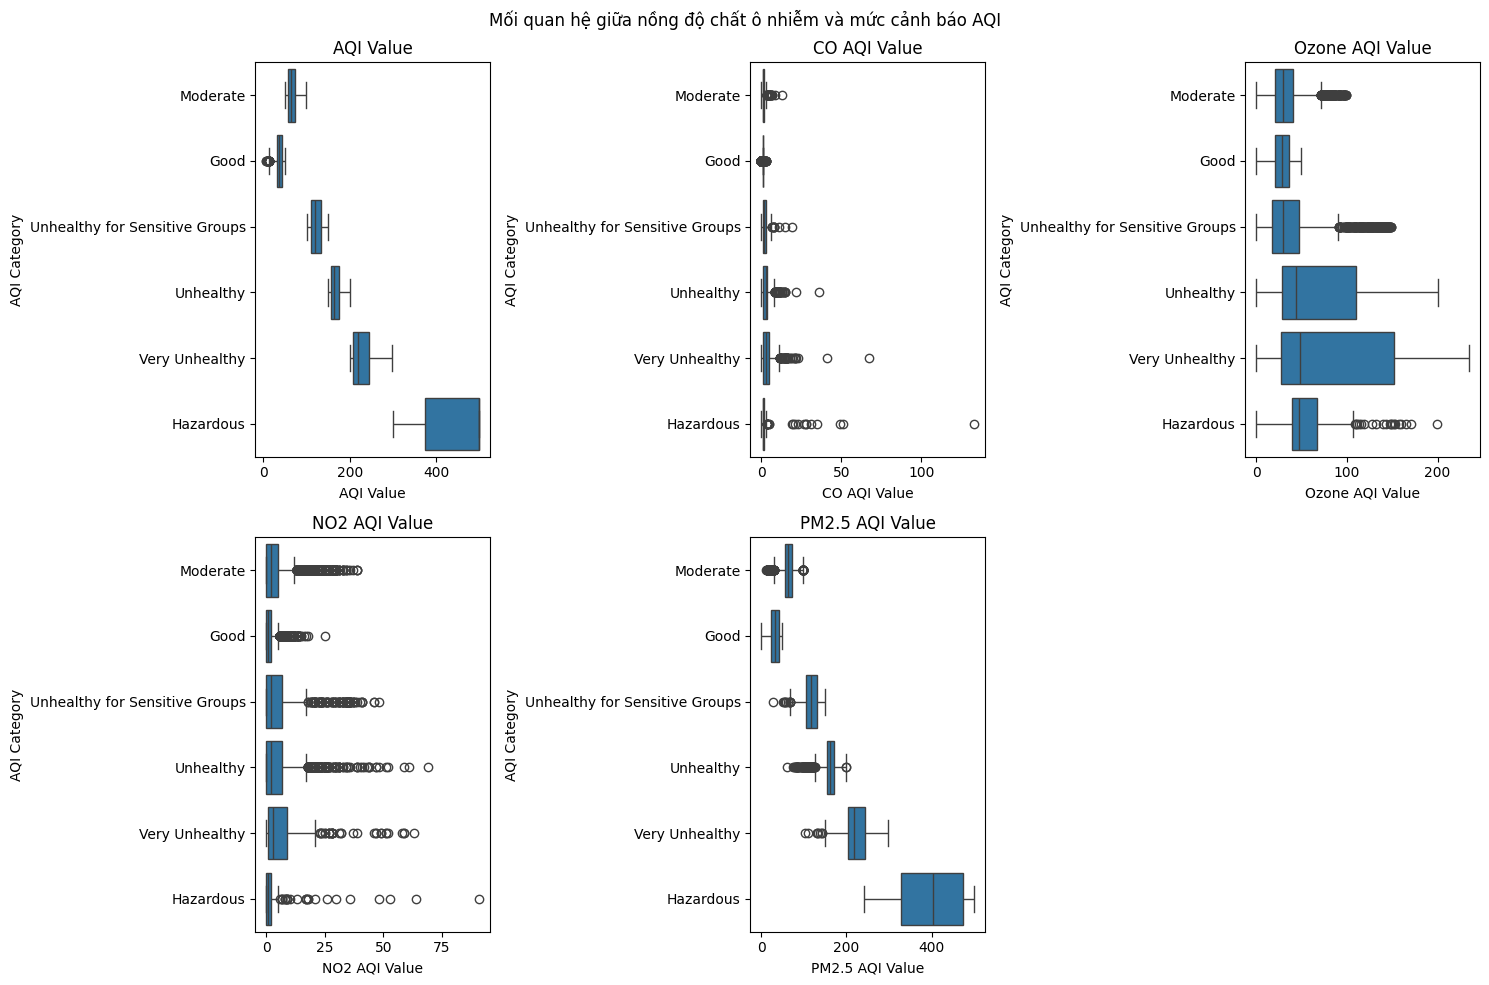

In [34]:
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,x=df[col[i]],y=df['AQI Category'])

plt.suptitle('Mối quan hệ giữa nồng độ chất ô nhiễm và mức cảnh báo AQI')    
plt.tight_layout()
plt.show()

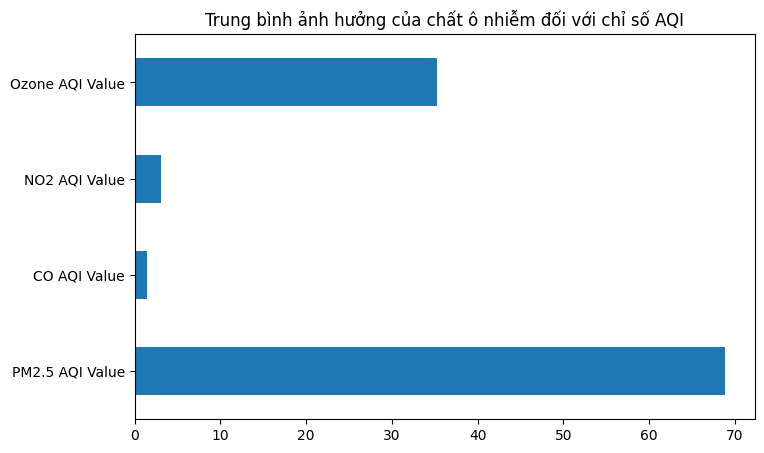

In [35]:
mean_values = df[
    ['PM2.5 AQI Value','CO AQI Value','NO2 AQI Value','Ozone AQI Value']
].mean()

mean_values.plot(kind='barh', figsize=(8,5))
plt.title("Trung bình ảnh hưởng của chất ô nhiễm đối với chỉ số AQI")
plt.show()

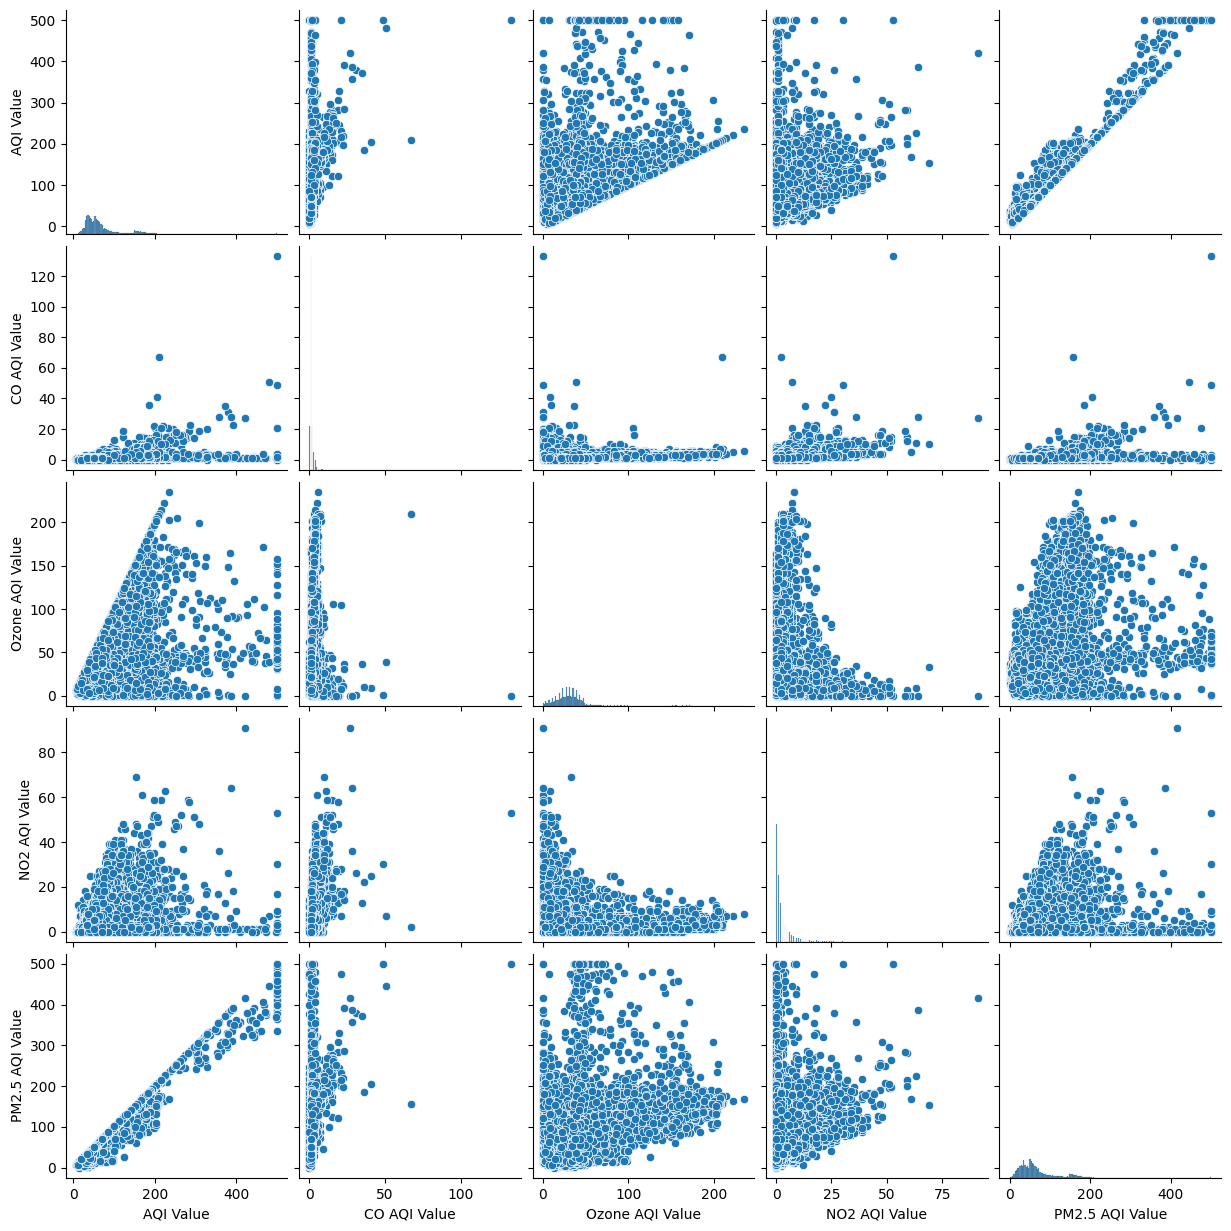

In [21]:
sns.pairplot(df)

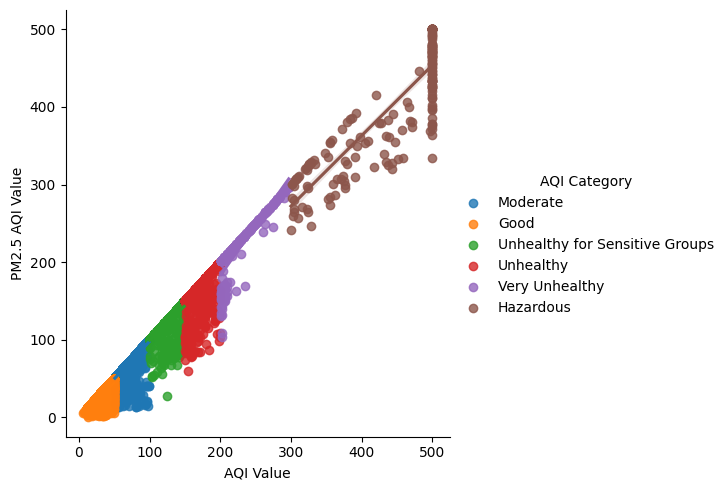

In [22]:
sns.lmplot(data=df,y='PM2.5 AQI Value',x='AQI Value',hue="AQI Category")

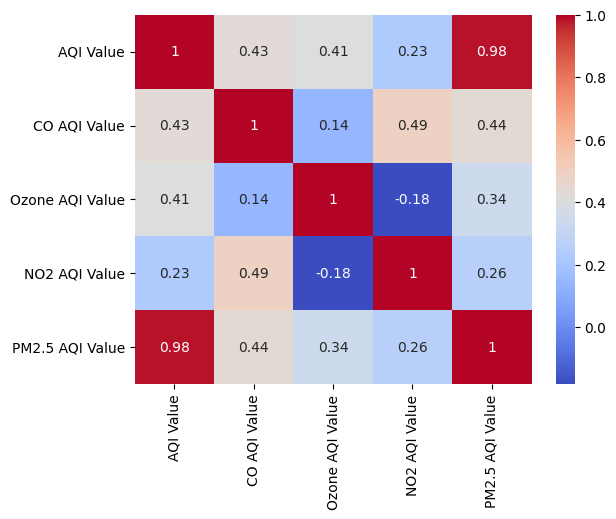

In [33]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


Phân tích mức độ ô nhiễm của các quốc gia

In [ ]:
# Đọc dữ liệu các thành phố từ file 'coordinates_of_the_cities.csv' chứa tên các thành phố và tọa độ của chúng
coords_df = pd.read_csv('coordinates_of_the_cities.csv')
coords_df.head()

,Country,City,lng,lat
0,Russian Federation,Praskoveya,44.2031,44.7444
1,Brazil,Presidente Dutra,-44.4900,-5.2900
2,Brazil,Presidente Dutra,-41.9869,-11.2958
3,Italy,Priolo Gargallo,15.1833,37.1667
4,Poland,Przasnysz,20.8833,53.0167


In [ ]:
# Thêm cột kinh độ và vĩ độ ứng với mỗi quốc gia trong DataFrame ban đầu
map_df = pd.merge(df, coords_df, on=['Country', 'City'], how='left')
map_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lng,lat
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.2031,44.7444
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-44.4900,-5.2900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-41.9869,-11.2958
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,15.1833,37.1667
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,20.8833,53.0167


Đang vẽ bản đồ với 16393 điểm dữ liệu có tọa độ...


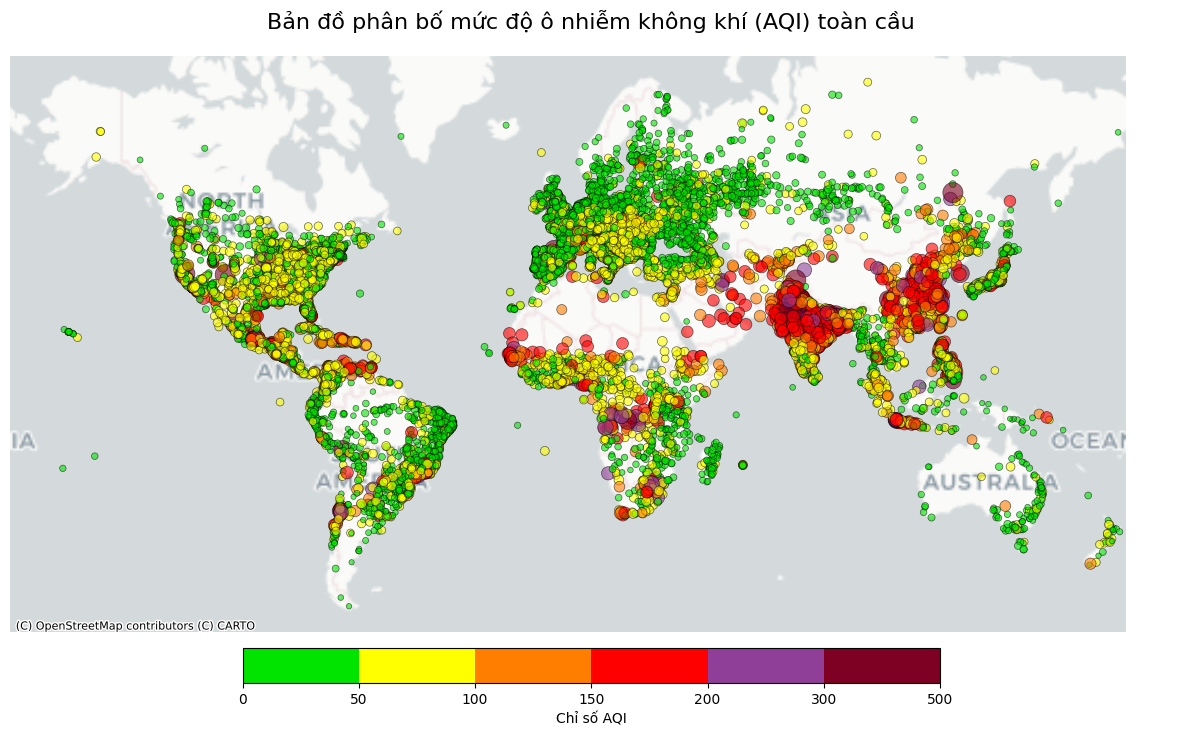

In [ ]:
import matplotlib.colors as mcolors

map_df = map_df.dropna(subset=['lng', 'lat'])

color_table = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']
cmap_aqi = mcolors.ListedColormap(color_table)

bins = [0, 50, 100, 150, 200, 300, 500]
norm_aqi = mcolors.BoundaryNorm(bins, cmap_aqi.N)

try:
    print(f"Đang vẽ bản đồ với {len(map_df)} điểm dữ liệu có tọa độ...")

    geometry = [Point(xy) for xy in zip(map_df['lng'], map_df['lat'])]
    gdf = gpd.GeoDataFrame(map_df, geometry=geometry)

    gdf.set_crs(epsg=4326, inplace=True)
    
    gdf = gdf.to_crs(epsg=3857)

    sizes = (gdf["AQI Value"] / gdf["AQI Value"].max()) * 200 + 10 

    fig, ax = plt.subplots(figsize=(15, 10))

    gdf.plot(ax=ax, 
         markersize=sizes,   
         alpha=0.6,        
         column="AQI Value", 
         cmap=cmap_aqi, 
         norm=norm_aqi,  
         edgecolor='black',   
         linewidth=0.5,
         legend=True,
         legend_kwds={
             'label': "Chỉ số AQI", 
             'orientation': "horizontal", 
             'pad': 0.02,
             'shrink': 0.6
         })

    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

    ax.set_title("Bản đồ phân bố mức độ ô nhiễm không khí (AQI) toàn cầu", fontsize=16, pad=20)
    ax.axis('off')

    plt.show()

except Exception as e:
    print(f"Lỗi khi vẽ bản đồ: {e}")

Top 10 quốc gia ô nhiễm nhất (chỉ tính các nước có >5 thành phố trong Dataset):
        Country        mean  count
0      Pakistan  178.788274    307
1         India  152.964228   2488
2       Senegal  152.424242     33
3  Saudi Arabia  149.285714     14
4        Gambia  147.000000      9
5         Yemen  144.571429      7
6          Oman  137.500000      6
7         China  126.953459    795
8    Uzbekistan  119.086207     58
9         Nepal  116.363636     33


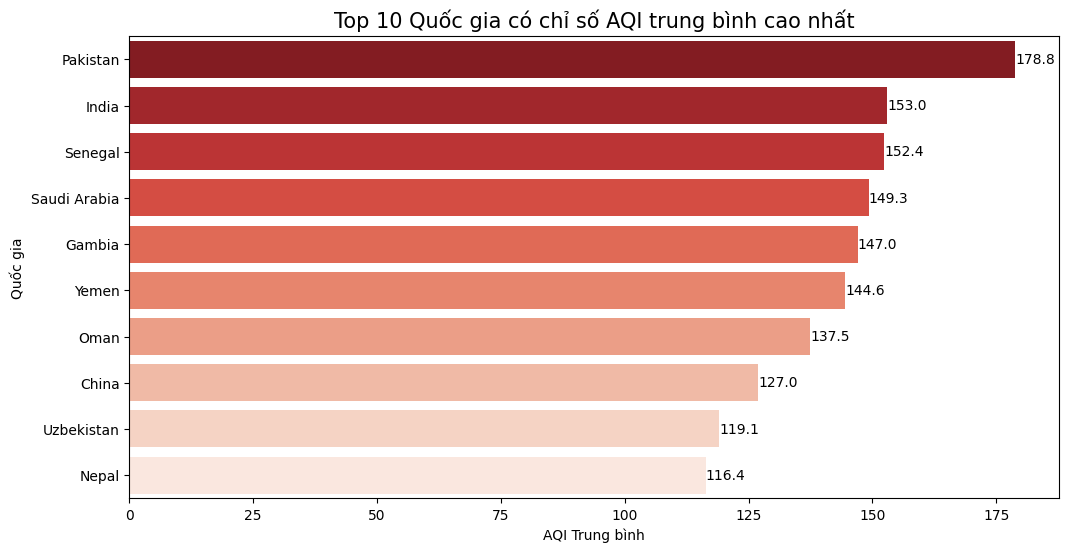

In [ ]:
country_stats = df.groupby('Country')['AQI Value'].agg(['mean', 'count'])

valid_countries = country_stats[country_stats['count'] > 5] 

top_10_polluted = valid_countries.sort_values(by='mean', ascending=False).head(10).reset_index()

print("Top 10 quốc gia ô nhiễm nhất (chỉ tính các nước có >5 thành phố trong Dataset):")
print(top_10_polluted)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_polluted, 
            x='mean', 
            y='Country', 
            hue='Country', 
            legend=False,  
            palette='Reds_r')
plt.title('Top 10 Quốc gia có chỉ số AQI trung bình cao nhất', fontsize=15)
plt.xlabel('AQI Trung bình')
plt.ylabel('Quốc gia')

for index, value in enumerate(top_10_polluted['mean']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.show()